# Orange Telecom Résiliation  
## Analyse et prédiction

Ce projet est réalisé sur un ensemble de données concernant la résiliation des abonnements des clients d’Orange Telecom. Cet ensemble de données comprends des informations sur l’activité des clients.  
Cet ensemble de données est composé en 2 parties : les variables explicatives et la variable expliquée (Résiliation)

In [1]:
# Importation des données
import os
import pandas as pd
import numpy as np
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
import matplotlib.colors as colors

In [2]:
# Lecture du répertoire courant
os.getcwd()

'C:\\Users\\ikhla\\Python\\intern'

In [34]:
# Lecture du Dataset
df = pd.read_csv('C:\\Users\\ikhla\\Python\\intern\\churn-bigml-20.csv')

In [35]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [36]:
# Replacement noms colonnes
old_cols = ["Account length","Area code", "International plan", "Voice mail plan", "Number vmail messages", "Total day minutes",
           "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge",
           "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls",
           "Total intl charge", "Customer service calls"]

new_cols = ["Account_length","Area_code", "International_plan", "Voice_mail_plan", "Number_vmail_messages", "Total_day_minutes",
           "Total_day_calls", "Total_day_charge", "Total_eve_minutes", "Total_eve_calls", "Total_eve_charge",
           "Total_night_minutes", "Total_night_calls", "Total_night_charge", "Total_intl_minutes", "Total_intl_calls",
           "Total_intl_charge", "Customer_service_calls"]

for i in range(len(old_cols)):
    df.rename(columns={old_cols[i]: new_cols[i]}, inplace=True)

In [37]:
df.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [38]:
# Informations sur le Dataset
print("Nombre de valeurs manquantes : ")
print(df.isnull().sum())
print("\n-------------------\n")
print("Nombre de doublons : ")
print(sum(df.duplicated())) #somme les doublons pur
print("\n-------------------\n")
print("Dimensions : ")
print(df.shape)
print("\n-------------------\n")
print("Types des variables : ")
print(df.dtypes)

Nombre de valeurs manquantes : 
State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
dtype: int64

-------------------

Nombre de doublons : 
0

-------------------

Dimensions : 
(667, 20)

-------------------

Types des variables : 
State                      object
Account_length              int64
Area_code                   int64
International_plan         object
Voice_mail_plan            object
Number_vmail_messages       int64
Total_day_minutes         float64
Total_day_calls     

On remarque qu'on a 666 lignes, aucune valeurs manquantes, aucun doublons. Le dataset semble bien nettoyé.

## Décomposition des variables :

- State, État : 51 États uniques aux États-Unis
- Account Length, Longueur du compte : durée de l'abonnement  
- Area Code, Code régional : le code régional 415 correspond à San Francisco, le 408 à San José et le 510 à la ville d'Oakland  
- International Plan, Plan international : "Oui" indique la présence d'un plan international et "Non" indique l'absence d'abonnement à un plan international  


- Voice Mail Plan, Plan messagerie vocale : "Oui" indique la présence d'un plan de messagerie vocale et "Non" indique l'absence d'abonnement à un plan de messagerie vocale  
- Number mail messages , Nombre de messages vocaux : nombre de messages vocaux allant de 0 à 50  
- Total day minutes, Minutes totales du jour : nombre total de minutes passées par les clients la journée  
- Total day calls, Appels totaux du jour : nombre total d'appels effectués par les clients la journée  
- Total day charge, Charge totale du jour : charge totale pour les clients la journée  


- Total eve minutes, Minutes totales du soir : nombre total de minutes passées par les clients le soir  
- Total eve call, Appels totaux du soir : nombre total d'appels effectués par les clients le soir  
- Total eve charge, Charge totale du soir : charge totale pour les clients le soir  
- Total night minutes,  Minutes totales de la nuit : nombre total de minutes passées par les clients la nuit  
- Total night calls, Appels totaux de la nuit : nombre total d'appels effectués par les clients la nuit  


- Total night charge, Charge totale de la nuit : charge totale pour les clients la nuit  
- Total intl minutes, Minutes totales d'appels à l'international : nombre total de minutes passées par les clients à l'international
- Total intl calls, Appels totaux à l'international : nombre total d'appels passées par les clients à l'international
- Total intl charge, Charge total à l'international : charge totale pour les clients à l'international
- Customer service calls, Appels totaux vers le service client : nombre total d'appels passées par les clients au service client
- Chrun, Résiliation : "True" indique que le client a procédé à une résiliation et "False" indique l'absence de résiliation

## Vérification du taux de résiliation

In [39]:
#labels
lab = df["Churn"].value_counts().keys().tolist() #extraction labels
#values
val = df["Churn"].value_counts().values.tolist() #extraction valeurs

# Définition des caractéristiques du diagramme
trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'orange' ,'black'],
                             line = dict(color = "white",
                                         width =  3)
                            ),
               rotation = 80,
               hoverinfo = "label+value",
               hole = 0.5
               
              )

#Mise en page du diagramme
layout = go.Layout(dict(title = "Taux de résiliation des clients chez Orange",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

On remarque qu'il existe 14,2% de taux de rétention chez les clients d'Orange.
Pour la prévision, on a un ensemble de données fortement déséquilibré, il sera donc nécessaire d'utiliser des techniques SMOTE pour ce type de données.

Les techniques SMOTE sont des méthodes de traitement de données pour l'apprentissage automatique qui vise à équilibrer les données en sur-échantillonnant la classe minoritaire. SMOTE génère des exemples synthétiques de la classe minoritaire en interpolant les caractéristiques des exemples proches de cette classe. Cette technique est utilisée pour résoudre le problème de déséquilibre de classe dans les données, où la classe minoritaire peut être sous-représentée.

## Analyse Univariée et Bivariée

In [9]:
# On supprime la colonne Account length qu'on utilisera pas ici
df = df.drop('Account_length',axis=1)

In [10]:
# Séparation des clients désabonnées des clients abonnées
churn     = df[df["Churn"] == bool(True)]
not_churn = df[df["Churn"] == bool(False)]

In [11]:
# Remplacement des variables qualitatives Yes/No par quantitatives 1 and 0
df['International_plan'] = df['International_plan'].replace({"Yes":1,"No":0}).astype(int)
df['Voice_mail_plan'] = df['Voice_mail_plan'].replace({"Yes":1,"No":0}).astype(int)

## Checking Voice-Mail

In [12]:
# Caractéristique des messages de Voice-Mail
df['Number_vmail_messages'].describe()

count    667.000000
mean       8.407796
std       13.994480
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max       51.000000
Name: Number_vmail_messages, dtype: float64

La plupart des messageries reçoivent en moyenne environ 8 messages vocaux.  
L'écart-type est de 13,99, ce qui signifie que les données sont dispersées sur une plage relativement large.  
La médiane (50%) est égale à 0, ce qui signifie que la moitié des messageries n'ont reçu aucun message vocal.  
Le quartile supérieur (75%) est égale à 20, ce qui signifie que seulement 25% des messageries ont reçu plus de 20 messages vocaux. 

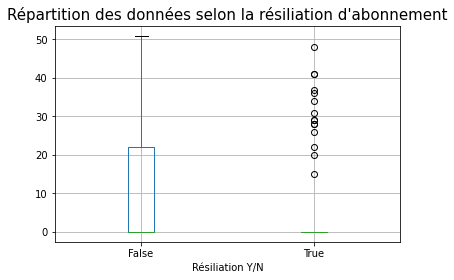

In [13]:
df.boxplot(column='Number_vmail_messages', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()

Nous pouvons remarquer pour la fonctionnalité de messagerie vocale lorsqu'il y a plus de 20 messages vocaux, il y a visiblement résiliation.
On peut donc faire l'hypothèse qu'il y a certainement une dégradation de la qualité de la messagerie vocale après 20/25 messages vocaux.  
On peut envisager :
- Soit un axe d'amélioration de la fonctionnalité de messagerie vocale 
- Soit un établissement d'une limite de 25 messages vocaux maximum et vérifier si les clients sont conservés.


## Total des minutes en journée affectant le taux de résiliation

In [14]:
df.Total_day_minutes.describe()

count    667.000000
mean     180.948126
std       55.508628
min       25.900000
25%      146.250000
50%      178.300000
75%      220.700000
max      334.300000
Name: Total_day_minutes, dtype: float64

En moyenne, le temps d'appel total en journée est d'environ 3 heures (180 minutes).  
Au minimum, il est de 26 minutes.  
Au maximum, il est de 6 heures (334 minutes).

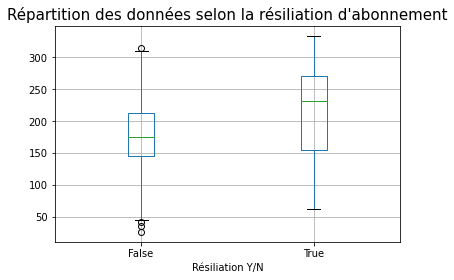

In [15]:
df.boxplot(column='Total_day_minutes', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()

Nous pouvons déduire du diagramme ci-dessus que les utilisateurs passant plus de 225 minutes, soit environ 4 heures, ont tendance à basculer vers un autre opérateur.  
On pourrait, hypothétiquement, envisager des perturbations du réseau qui peuvent devenir gênantes à long terme.

## Total des appels en journée affectant le taux de résiliation

In [16]:
df.Total_day_calls.describe()

count    667.000000
mean     100.937031
std       20.396790
min       30.000000
25%       87.500000
50%      101.000000
75%      115.000000
max      165.000000
Name: Total_day_calls, dtype: float64

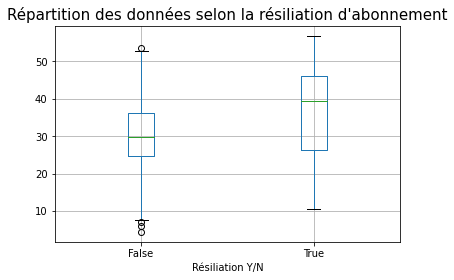

In [17]:
df.boxplot(column='Total_day_charge', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()


Nous pouvons constater ici que, en moyenne, 100 appels sont passés dans la journée, ce qui est une bonne indication pour l'entreprise. 
On peut aussi remarque que les clients qui ont résiliés leurs abonnements sont ceux qui ont passés le plus d'appels.

## Total du côut de l'abonnement en journée affectant le taux de résiliation

In [18]:
df.Total_day_charge.describe()

count    667.000000
mean      30.761769
std        9.436463
min        4.400000
25%       24.860000
50%       30.310000
75%       37.520000
max       56.830000
Name: Total_day_charge, dtype: float64

En moyenne, l'abonnement des utilisateurs leur côute 30$    

Au minimum, l'abonnement des utilisateurs leur côute 25$    

Au maximum, l'abonnement des utilisateurs leur côute 57$    

La charge moyenne est d'environ 30$ ce qui est une stratégie de tarification décente!


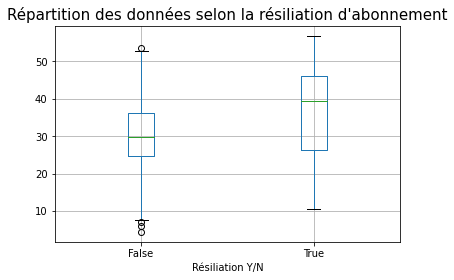

In [19]:
df.boxplot(column='Total_day_charge', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()

Ici nous pouvons clairement indiquer une bonne stratégie à mettre en œuvre.  
Nous pouvons en conclure une chose, les clients ayant des minutes de communication plus importantes et qui tendent à quitter leurs abonnements, ont des abonnements plus couteux.  
Il y a une défaillance dans la stratégie de tarification de l'entreprise.

Hypothèse:

La stratégie de tarification doit être réévaluée.
Les clients qui ont des minutes d'appel et des appels importants doivent bénéficier d'une remise en fin de compte.

## Total des minutes en soirée affectant le taux de résiliation

In [20]:
df.Total_eve_minutes.describe()

count    667.000000
mean     203.355322
std       49.719268
min       48.100000
25%      171.050000
50%      203.700000
75%      236.450000
max      361.800000
Name: Total_eve_minutes, dtype: float64

En moyenne, le temps d'appel total en soirée est d'environ 3h30 (203 minutes).   
Au minimum, il est de 48 minutes.  
Au maximum, il est de 6 heures (361 minutes).   
L'écart-type est plutôt élevé.

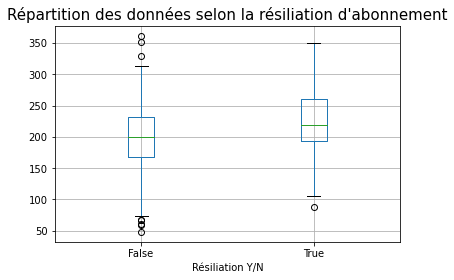

In [21]:
df.boxplot(column='Total_eve_minutes', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()


Encore une fois c'est la même conclusion, les utilisateurs qui résilient leurs abonnements sont les utilisateurs qui ont le temps d'appel le plus élevé.

## Total du côut de l'abonnement en soirée affectant le taux de résiliation

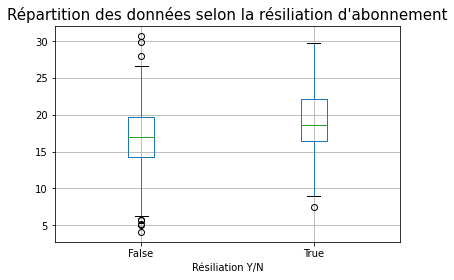

In [22]:
df.boxplot(column='Total_eve_charge', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()

Comme indiqué par les boîtes à moustaches ci-dessus, nous pouvons en conclure que les clients qui paient le plus cher, ont tendance à abandonner leurs abonnements.

## Total des minutes de nuit affectant le taux de résiliation

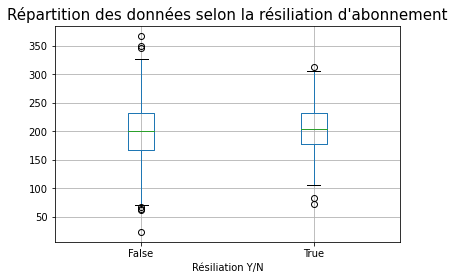

In [23]:
df.boxplot(column='Total_night_minutes', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()

La boîte à moustaches indique que les clients fidèles ont plus de temps d'appel dans la nuit !   
Ce qui pourrait confirmer notre hypothèse selon laquelle il y a un problème de réseau, puisque la nuit il y a moins d'appels et donc moins de problèmes de réseaux.

## Total des appels de nuit affectant le taux de résiliation

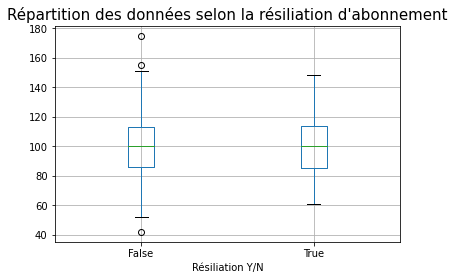

In [24]:
df.boxplot(column='Total_night_calls', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()

En revanche, le nombre d'appels pendant la nuit, lui, semble plutôt similaire. 

##  Total de minutes d'appels internationaux affectant le taux de résiliation

In [25]:
df.Total_intl_minutes.describe()

count    667.000000
mean      10.238381
std        2.807850
min        0.000000
25%        8.600000
50%       10.500000
75%       12.050000
max       18.300000
Name: Total_intl_minutes, dtype: float64

En moyenne, le temps total d'appel à l'international est d'environ 10 minutes.   
Au minimum, il est de 0 minutes.  
Au maximum, il est de 18 minutes.   
L'écart-type est plutôt faible, on peut se fier plus facilement à ces chiffres.

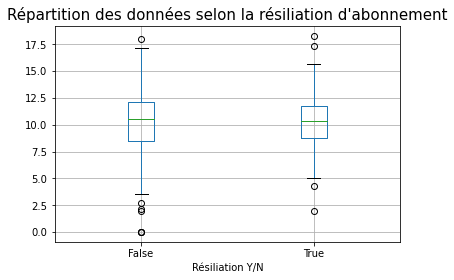

In [26]:
df.boxplot(column='Total_intl_minutes', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()

On remarque ici que ceux sont les clients fidèles qui ont tendance à passer plus de minutes d'appel à l'international.

##  Total d'appels internationaux affectant le taux de résiliation

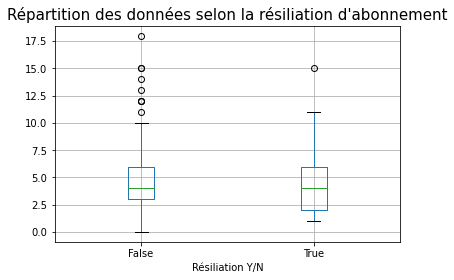

In [27]:
df.boxplot(column='Total_intl_calls', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()

On remarque que les utilisateurs qui résilient leurs abonnements sont ceux qui effectuent le plus d'appels à l'international.
Grâce à l'analyse précedente, on sait aussi que ce sont ceux qui ont les appels les plus courts.

Hypothèse : 
Les clients qui ont résiliées, ont eu besoin d'effectuer plus d'appels internationaux mais à cause de la mauvaise réception, ces appels ont été très courts.

## Total du côut de l'abonnement à l'international affectant le taux de résiliation

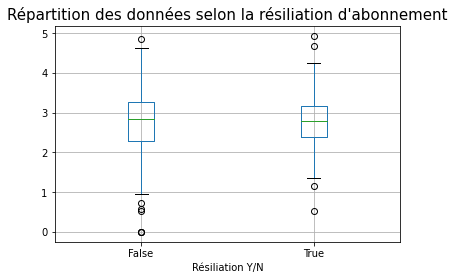

In [28]:
df.boxplot(column='Total_intl_charge', by='Churn')
plt.suptitle("")

plt.title("Répartition des données selon la résiliation d'abonnement", fontsize=15)
plt.xlabel("Résiliation Y/N")
plt.show()

Une stratégie de tarification différente et une optimisation du tarif d'appel à international pourraient entraîner une baisse du taux de résiliation.

## Taux de résiliation en fonction des Etats

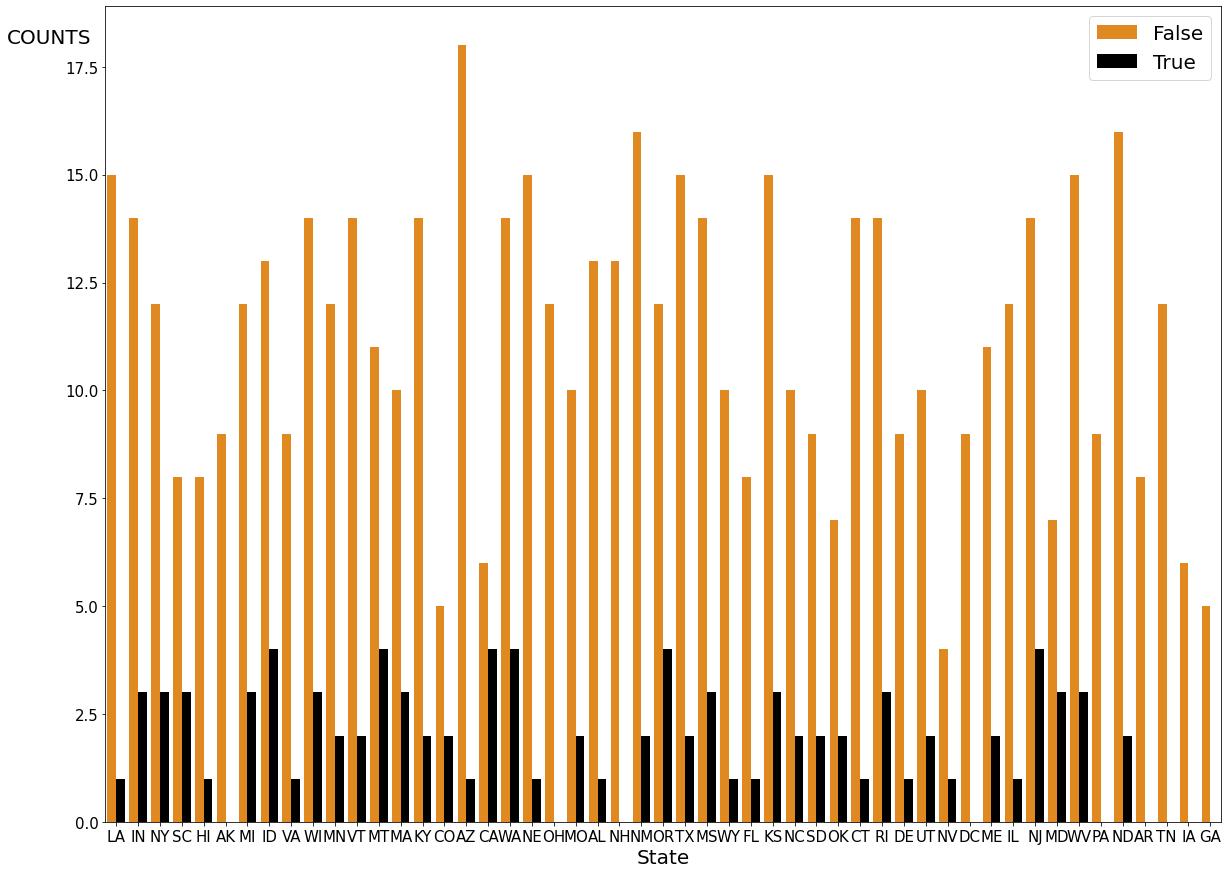

In [29]:
fig, fig_etat = plt.subplots(figsize=(20,15))

fig_etat = sns.countplot(x='State', hue='Churn', data=df, palette=['#FF8C00', '#000000'])

fig_etat.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20) # Label Y, rotation, position, taille
fig_etat.set_xlabel('State', size=20) #Label X et taille
fig_etat.yaxis.set_label_coords(-0.05, 0.95)  # Emplacement des labels d'axes
fig_etat.legend(loc=1,fontsize=20) # Position et taille de la légende

fig_etat.tick_params(labelsize=15)  # Taille des labels dans les axes


Le taux de résiliation est élevé dans les régions de Colorado, de South Carolina et de California.  
Une mise à niveau du réseau est fortement recommandée dans ces zones.

## Taux de résiliation en fonction des appels au service client

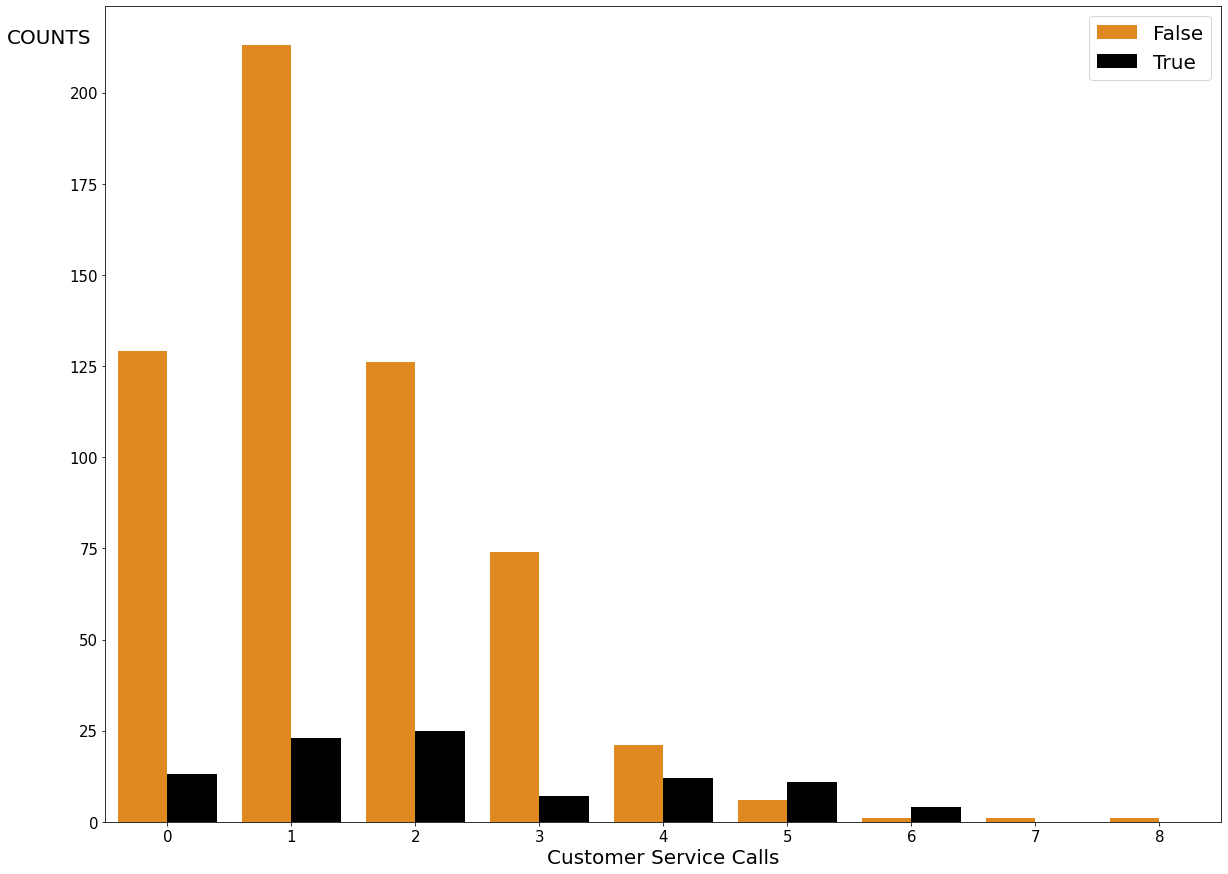

In [30]:
# Customer Calls
fig, fig_cc = plt.subplots(figsize=(20,15)) #création figure

fig_cc = sns.countplot(x='Customer_service_calls', hue='Churn', data=df, palette=['#FF8C00', '#000000']) #création diagramme

fig_cc.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20) # Label Y, rotation, position, taille
fig_cc.set_xlabel('Customer Service Calls', size=20) #Label X et taille
fig_cc.yaxis.set_label_coords(-0.05, 0.95)  # Emplacement des labels d'axes
fig_cc.legend(loc=1,fontsize=20); # Position et taille de la légende

fig_cc.tick_params(labelsize=15)  # Taille des labels dans les axes


Certains clients n'ont pas osé appeler le service client pour résoudre leur problème et ont basculé directement vers un autre opérateur de réseau.  
D'autres clients, ont appelé une fois, et ont un taux élevé de résiliation, ce qui indique que leur problème n'a pas été résolu lors de la première tentative.  


Un retour d'information est nécessaire dans de telles situations.   
Il est important de réclamer une confirmation au client, à propos de la résolution du problème, lors de la première et/ou seconde tentative.

## Corrélation

In [31]:
# Transformation en variable quantitative
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})

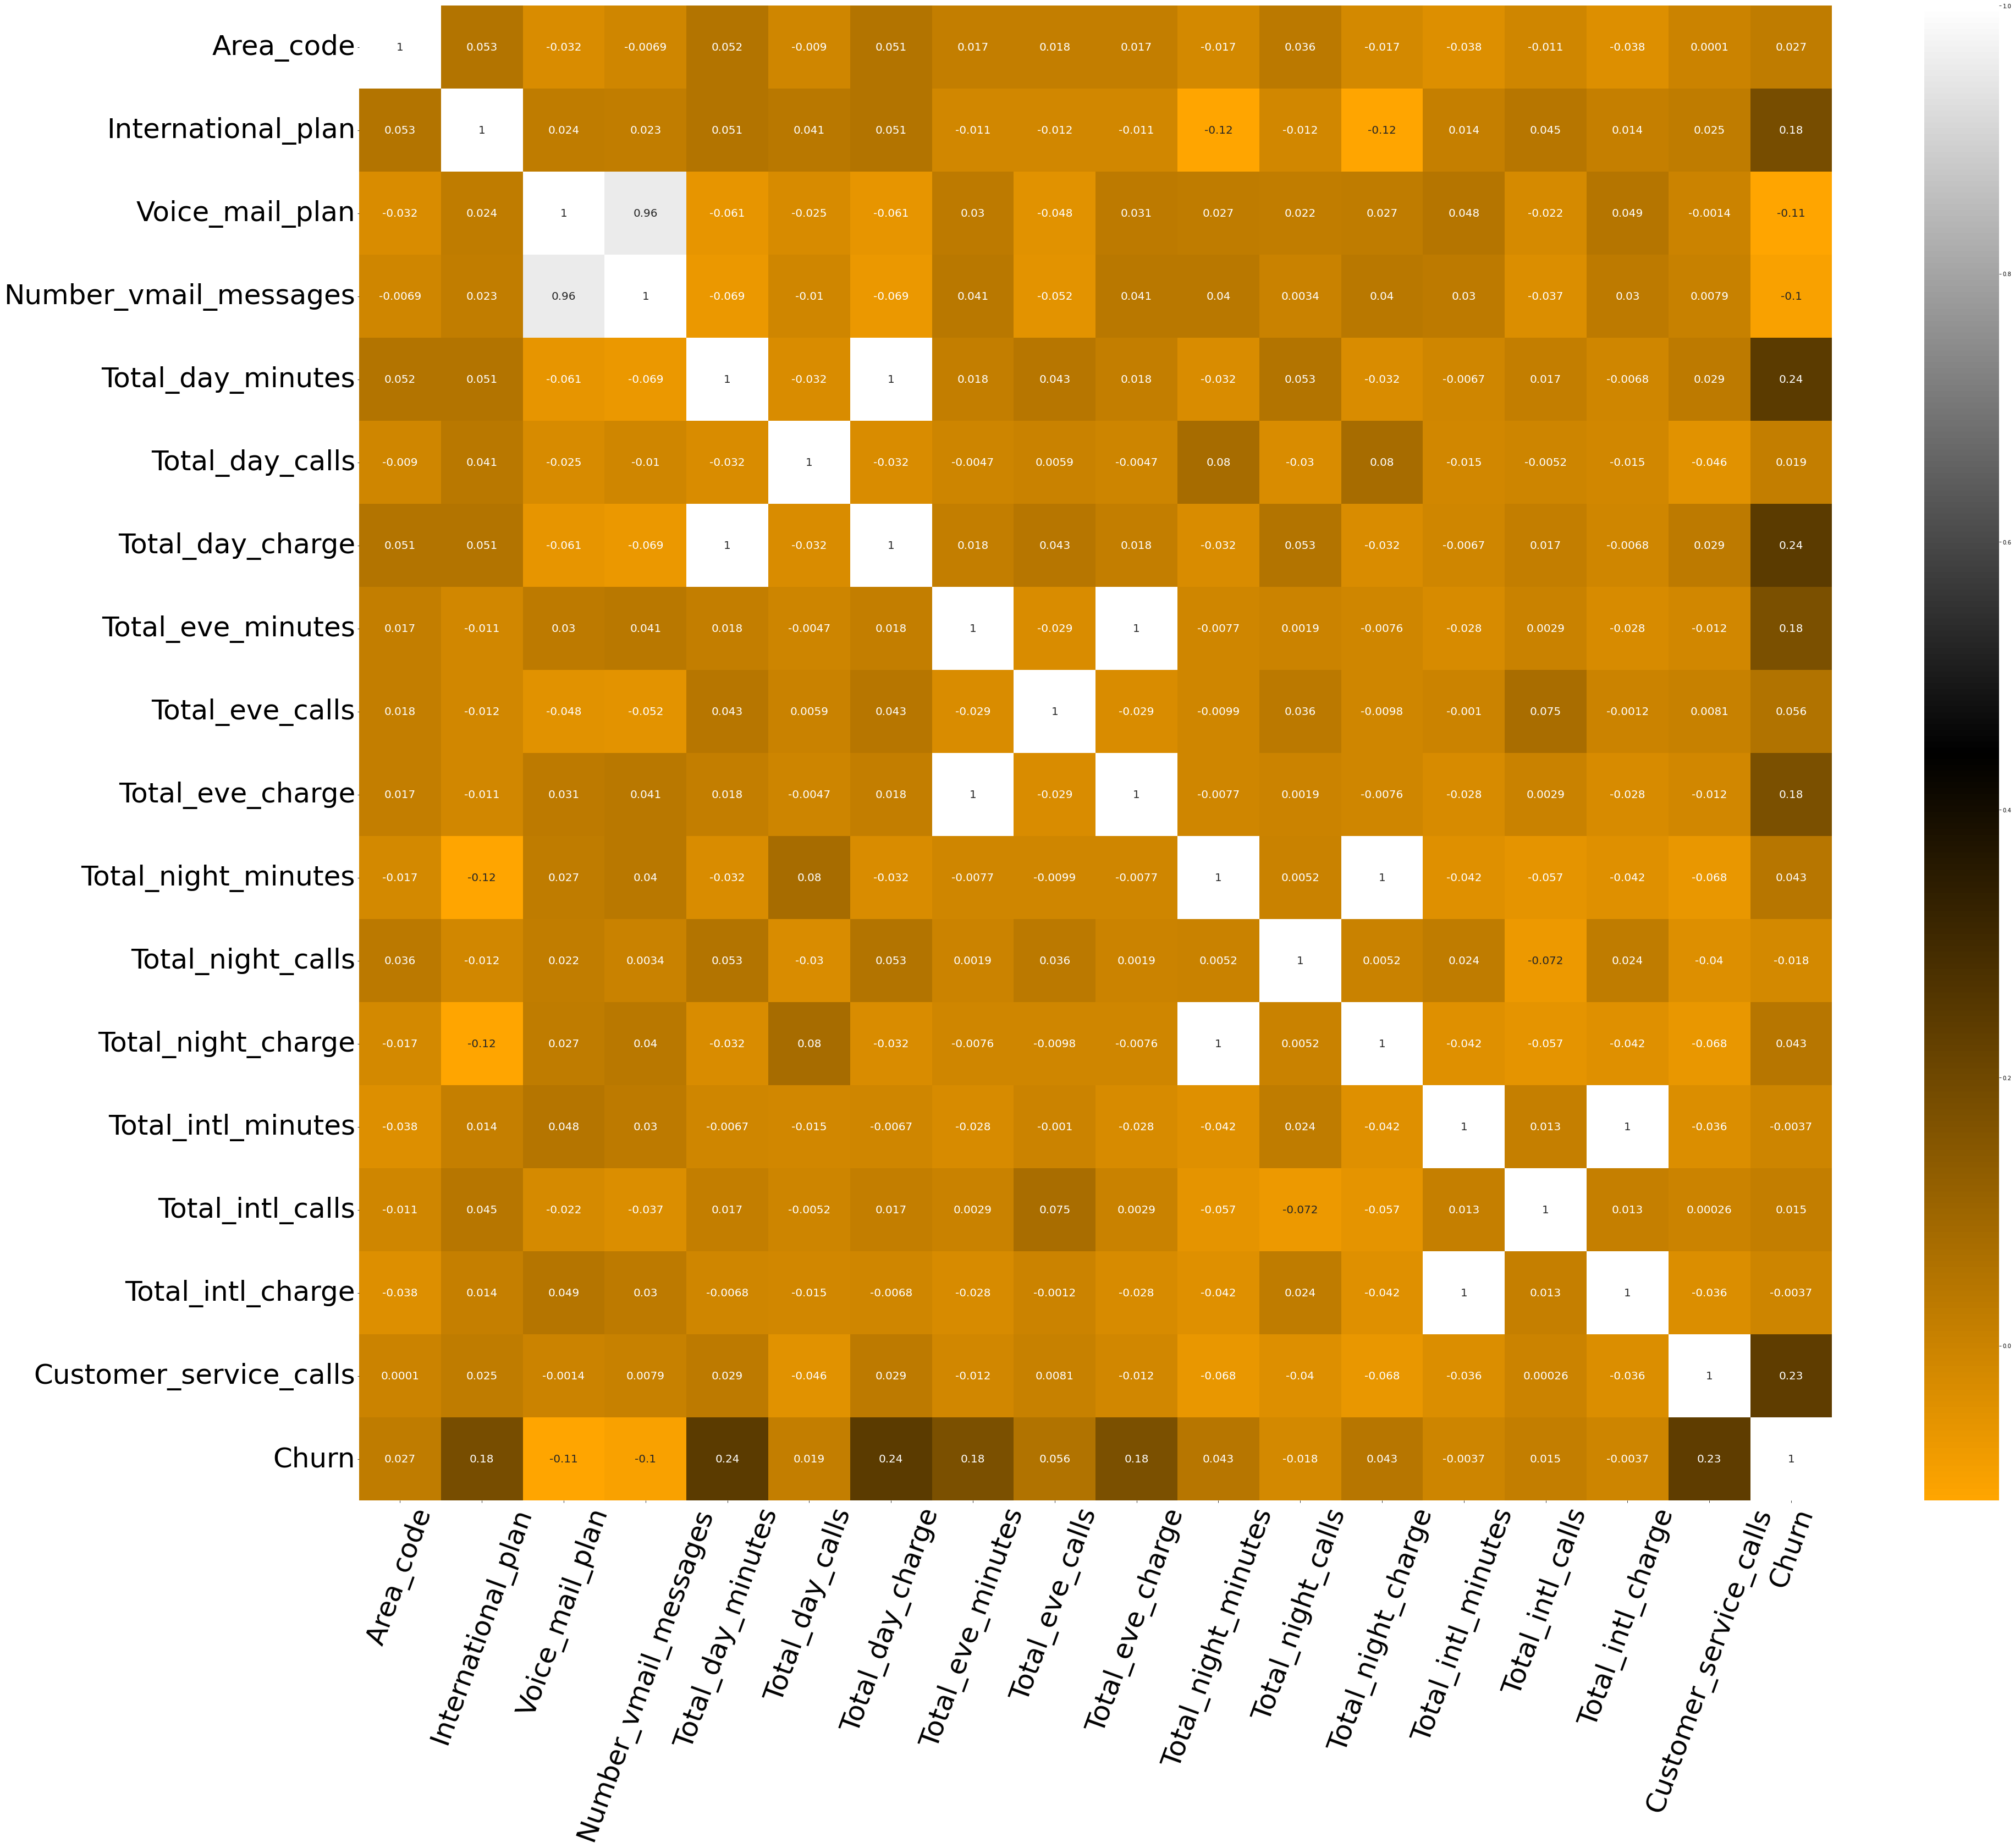

In [32]:
# Réalisation d'une matrice de corrélation 
# Suppression de ce qui pourrait causer une multi-colinéarité dans notre modèle de prédiction

# Creation matrice de corrélation
data = df.corr()

# Création figure
fig, fig_corr = plt.subplots(figsize=(60,50))

# Personnalisation couleurs
cmap = colors.LinearSegmentedColormap.from_list("", ["orange", "black", "white"]) #(""), est un nom pour la palette de couleurs
# Pour notre modèle de prévision :
# orange = bien (faible correlation), noir = mauvais (forte correlation) entre les variables indépendantes


# Tracage heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=fig_corr,
                annot_kws={"size":20},  #Taille annotation
               cbar_kws={"shrink": 1} # Taille barre des couleurs
               );

# Taille des labels
fig_corr.tick_params(labelsize=50) 

fig_corr.set_yticklabels(g.get_yticklabels(), rotation=0);
fig_corr.set_xticklabels(g.get_xticklabels(), rotation=70);

- Voice_mail_plan et Number_vmail_plan : 0.96    

Conclusion : Corrélation importante entre le nombre de message dans la messagerie et si l'utilisateur a pris l'option de messagerie vocal --> logique  
    
- Total_day_charge et Total_day_minutes : 1  
- Total_eve_charge et Total_eve_minutes : 1  
- Total_night_charge et Total_night_minutes : 1  
- Total_intl_charge et Total_intl_minutes : 1   

Conclusion : Il y a une correlation parfaite entre le nombre de minutes d'appel et le côut --> logique
    
    
- churn et International_plan : 0.18  
-churn et Voice_mail_plan : -0.11  
-churn et Number_vmail_plan : -0.1  
-churn et Number_vmail_messages : 0.24  
-churn et Total_day_charge : 0.24  
-churn et Total_eve_minutes : 0.18  
-churn et Total_eve_charge : 0.18  
-churn et Customer_service_calls : 0.23  


Conclusion :
Ici les corrélations sont plutôt faible mais on détecte certains liens entre la résilation et :  
    - le nombre de messages vocaux  
    - le coût de l'abonnement en journée  
    - la relation service client  
    

Axes d'amélioration :  
Mise à niveau du réseau pour améliorer les services aux utilisateurs de longue durée.  
Mise à jour des stratégies de tarification.  
Mise à jour et optimisation des tarifs d’appels internationaux.  
Mise en œuvre d’une meilleure infrastructure de réseau dans les régions du Colorado, de South Carolina et de California où le taux de résiliation est plus élevé.

## Prédiction 